Discretization is the process of transforming continuous variables into discrete features by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Subsequently, these intervals or bins are treated as categorical data

Many machine learning models, such as decision trees and Naïve Bayes, work better with discrete attributes. In fact, decision tree-based models make decisions based on discrete partitions over the attributes. During induction, a decision tree evaluates all possible feature values to find the best cut-point. Therefore, the more values the feature has, the longer the induction time of the tree. In this sense, discretization can improve model performance and reduce the time it takes to train the models.

Discretization has additional advantages. Data is reduced and simplified; discrete features can be easier to understand by domain experts. Discretization can change the distribution of skewed variables; if sorting observations across bins with equal frequency, the values are spread more homogeneously across the range. Additionally, discretization can minimize the influence of outliers by placing them at lower or higher intervals, together with the remaining inlier values of the distribution. Overall, discretization reduces and simplifies data, making the learning process faster and yielding more accurate results

Discretization can also lead to a loss of information, for example, by combining values that are strongly associated with different classes or target values into the same bin. Therefore, the aim of a discretization algorithm is to find the minimal number of intervals without a significant loss of information. In practice, many discretization procedures require the user to input the number of intervals into which the values will be sorted. Then, the job of the algorithm is to find the cut-points for those intervals. Among these procedures, we find the most widely used equal-width and equal-frequency discretization methods. Discretization methods based on decision trees otherwise are able to find the optimal number of partitions, as well as the cut-points


Performing equal-width discretization

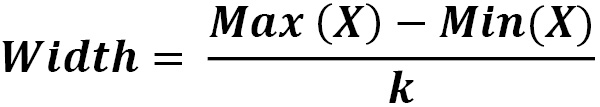

Then, if the values of the variable vary between 0 and 100, we can create five bins like this: width = (100-0) / 5 = 20; the bins will be 0–20, 20–40, 40–60, and 80–100. The first and final bins (0–20 and 80–100) can be expanded to accommodate values smaller than 0 or greater than 100, by extending the limits to minus and plus infinity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualWidthDiscretiser


In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,)


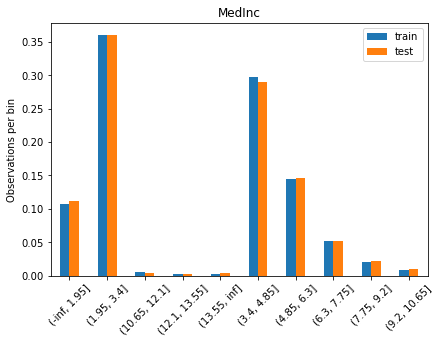

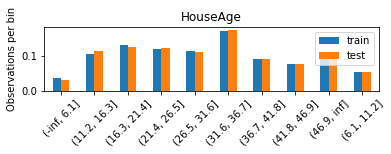

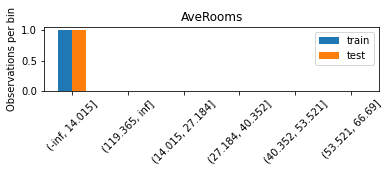

In [3]:
#we can use featuree_enginering 
from feature_engine.discretisation import EqualWidthDiscretiser

variables = ['MedInc', 'HouseAge', 'AveRooms']

""" We can set return_object=True 
to return the variables as objects and then 
use any of the Feature-engine or Category Encoders transformers."""

disc = EqualWidthDiscretiser(bins=10,variables=variables,return_boundaries=True)

disc.fit(X_train)

train_f = disc.transform(X_train)
test_f = disc.transform(X_test)


plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):
    # Location of plot in figure
    ax = plt.subplot(3, 1, i + 1)
    
    # The variable to plot
    var = variables[i]
    
    # Determine proportion of observations per bin
    t1 = train_f[var].value_counts(normalize=True, sort=False)
    t2 = test_f[var].value_counts(normalize=True, sort=False)
    
    # Concatenate proportions
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    
    # Sort the intervals
    tmp.sort_index(inplace=True)
    
    # Make plot
    tmp.plot.bar(ax=ax)
    plt.xticks(rotation=45)
    plt.ylabel('Observations per bin')
    
    # Add variable name as title
    ax.set_title(var)
    
    plt.show()



Implementing equal-frequency discretization

In [4]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

variables = ['MedInc', 'HouseAge', 'AveRooms']

disc = EqualFrequencyDiscretiser(q=8, variables =variables,return_boundaries=True)

#discretizer to the train set so that it learns the interval limits
disc.fit(X_train)

train_t = disc.transform(X_train)

test_t = disc.transform(X_test)

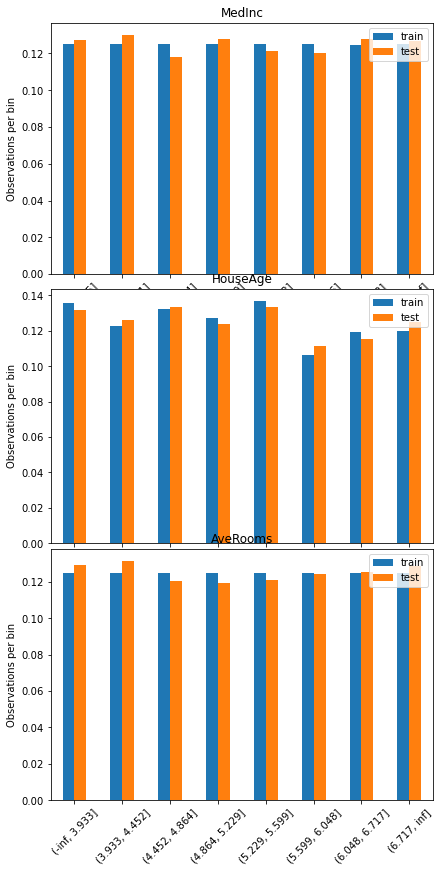

In [5]:
plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):
    # Location of plot in figure
    ax = plt.subplot(3, 1, i + 1)
    
    # The variable to plot
    var = variables[i]
    
    # Determine proportion of observations per bin
    t1 = train_t[var].value_counts(normalize=True)
    t2 = test_t[var].value_counts(normalize=True)
    
    # Concatenate proportions
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    
    # Sort the intervals
    tmp.sort_index(inplace=True)
    
    # Make plot
    tmp.plot.bar(ax=ax)
    plt.xticks(rotation=45)
    plt.ylabel("Observations per bin")
    
    # Add variable name as title
    ax.set_title(var)

plt.show()


Discretizing the variable into arbitrary intervals

In various industries, it is common to group variable values into segments that make sense for the business. For example, we might want to group the variable age in intervals representing children, young adults, middle-aged people, and retired people. Alternatively, we might group ratings into bad, good, and excellent. On other occasions, if we know that the variable is in a certain scale, for example, logarithmic, we might want to define the interval cut-points within that scale.

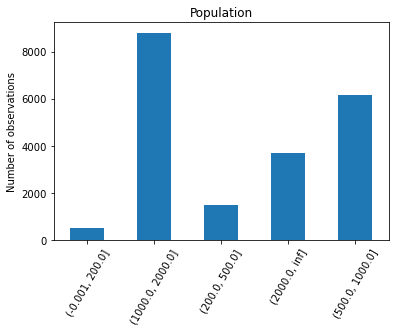

In [6]:
from feature_engine.discretisation import ArbitraryDiscretiser

intervals = [0, 200, 500, 1000, 2000, np.Inf]

discretizer = ArbitraryDiscretiser(binning_dict={"Population": intervals},return_boundaries=True,)

X_t = discretizer.fit_transform(X)

X_t.head()

X_t['Population'].value_counts().sort_index().plot.bar()

plt.xticks(rotation=60)

plt.ylabel("Number of observations")

plt.title("Population")

plt.show()


Performing discretization with k-means clustering

The aim of a discretization procedure is to find a set of cut-points that partition a variable into a small number of intervals that have good class coherence. To create partitions that group similar observations, we can use clustering algorithms, such as k-means.

In discretization using k-means clustering, the partitions are the clusters identified by the k-means algorithm. The k-means clustering algorithm has two main steps. In the initialization step, k observations are chosen randomly as the initial centers of the k clusters, and the remaining data points are assigned to the closest cluster. The proximity to the cluster is measured by a distance measure such as the Euclidean distance. In the iteration step, the centers of the clusters are re-computed as the average points of all of the observations within the cluster, and the observations are reassigned to the newly created closest cluster. The iteration step continues until the optimal k centers are found

In [7]:
import pandas as pd

from sklearn.cluster import KMeans

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from yellowbrick.cluster import KElbowVisualizer

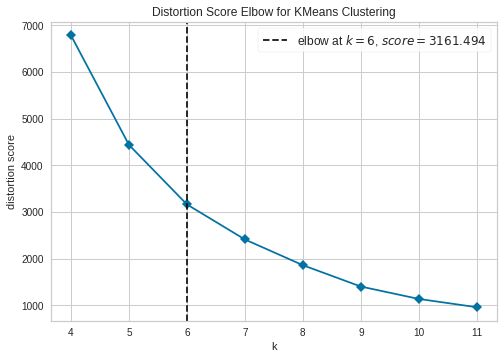

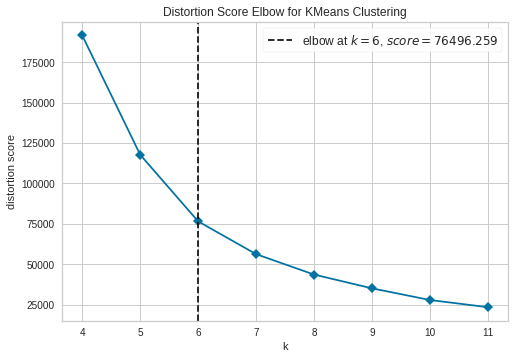

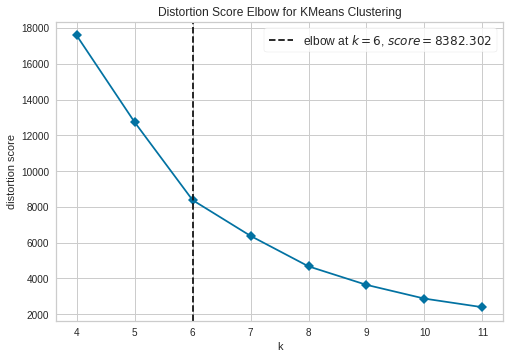

In [8]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,)

variables = ['MedInc', 'HouseAge', 'AveRooms']

# set up a k-means clustering algorithm 
k_means = KMeans(random_state=10)


#set up viulizer
for variable in variables:
    visulizer = KElbowVisualizer(k_means,k=(4,12),metric="distortion",timings=False)
    #Fit the data to the visualizer
    visulizer.fit(X_train[variable].to_frame())
    #Finalize and render the figure
    visulizer.show()
    

In [9]:
k=6

disc = KBinsDiscretizer(n_bins=k, encode="onehot-dense", strategy="kmeans")

disc.fit(X_train[variables])

disc.bin_edges_

train_features = disc.transform(X_train[variables])

test_features = disc.transform(X_test[variables])

#create names for the new features
var_names = [f"{var}_cluster_{i}" for var in variables for i in range(k)]


var_names


['MedInc_cluster_0',
 'MedInc_cluster_1',
 'MedInc_cluster_2',
 'MedInc_cluster_3',
 'MedInc_cluster_4',
 'MedInc_cluster_5',
 'HouseAge_cluster_0',
 'HouseAge_cluster_1',
 'HouseAge_cluster_2',
 'HouseAge_cluster_3',
 'HouseAge_cluster_4',
 'HouseAge_cluster_5',
 'AveRooms_cluster_0',
 'AveRooms_cluster_1',
 'AveRooms_cluster_2',
 'AveRooms_cluster_3',
 'AveRooms_cluster_4',
 'AveRooms_cluster_5']

In [10]:
X_train = pd.concat([X_train,pd.DataFrame(train_features, columns=var_names,index=X_train.index)], axis=1)

X_test = pd.concat([X_test,pd.DataFrame(test_features, columns=var_names,index=X_test.index)], axis=1)

X_test

X_train.drop(labels=variables, axis=1, inplace=True)
X_test.drop(labels=variables, axis=1, inplace=True)


In [12]:
X_test

,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_cluster_0,MedInc_cluster_1,MedInc_cluster_2,MedInc_cluster_3,MedInc_cluster_4,...,HouseAge_cluster_2,HouseAge_cluster_3,HouseAge_cluster_4,HouseAge_cluster_5,AveRooms_cluster_0,AveRooms_cluster_1,AveRooms_cluster_2,AveRooms_cluster_3,AveRooms_cluster_4,AveRooms_cluster_5
1989,0.700000,193.0,4.825000,36.73,-119.79,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
256,1.184116,836.0,3.018051,37.77,-122.21,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7887,1.087912,1387.0,3.810440,33.87,-118.04,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4581,1.196000,3051.0,3.051000,34.06,-118.28,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1993,1.161677,606.0,3.628743,36.73,-119.81,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.045662,712.0,3.251142,38.27,-121.26,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19648,0.933014,647.0,3.095694,37.48,-120.89,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9845,0.941476,704.0,1.791349,36.58,-121.90,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,1.064103,1052.0,2.247863,33.62,-117.93,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train

,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_cluster_0,MedInc_cluster_1,MedInc_cluster_2,MedInc_cluster_3,MedInc_cluster_4,...,HouseAge_cluster_2,HouseAge_cluster_3,HouseAge_cluster_4,HouseAge_cluster_5,AveRooms_cluster_0,AveRooms_cluster_1,AveRooms_cluster_2,AveRooms_cluster_3,AveRooms_cluster_4,AveRooms_cluster_5
1989,0.700000,193.0,4.825000,36.73,-119.79,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
256,1.184116,836.0,3.018051,37.77,-122.21,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7887,1.087912,1387.0,3.810440,33.87,-118.04,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4581,1.196000,3051.0,3.051000,34.06,-118.28,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1993,1.161677,606.0,3.628743,36.73,-119.81,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.045662,712.0,3.251142,38.27,-121.26,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19648,0.933014,647.0,3.095694,37.48,-120.89,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9845,0.941476,704.0,1.791349,36.58,-121.90,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,1.064103,1052.0,2.247863,33.62,-117.93,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for . If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

Implementing feature binarization

Some datasets contain sparse variables. Sparse variables are those where the majority of the values are 0. The classical example of sparse variables are those derived from text data through the bag-of-words model, where each variable is a word, and each value represents the number of times the word appears in a certain document. Given that a document contains a limited number of words, whereas the feature space contains the words that appear across all documents, most documents, that is, most rows, will show the value of 0 for most columns. But words are not the sole example. If we think about house details data, the variable number of saunas will also be 0 for most houses. In summary, some variables have very skewed distributions, where most observations show the same value, usually 0, and only a few observations show different, usually higher, values.

A more robust representation of these sparse or highly skewed variables is to binarize them by clipping all values greater than 1 to 1. In fact, binarization is commonly performed on text count data, where we consider the presence or absence of a feature rather than a quantified number of occurrences of a word.

In [15]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Binarizer

from feature_engine.wrappers import SklearnTransformerWrapper

# perform binarization, let’s set up binarizer to clip all values greater than 1, to 1

binarizer = Binarizer(threshold = 0)

#from scikit-learn will return a NumPy array by default, so to return a dataframe, let’s wrap it with the Feature-engine wrapper
wrapper = SklearnTransformerWrapper(transformer=binarizer)

data_t = wrapper.fit_transform(data)

variables = data_t.columns.to_list()

plt.figure(figsize=(20, 20), constrained_layout=True)

for i in range(10):

    # location in figure

    ax = plt.subplot(3, 4, i + 1)

  # variable to plot

    var = variables[i]

    # determine proportion of observations per bin

    t = data_t[var].value_counts(normalize=True)

    t.plot.bar(ax=ax)

    plt.xticks(rotation=45)

    plt.ylabel("Observations per bin")

    # add variable name as title

    ax.set_title(var)

    plt.show()


#Using decision trees for discretization

Decision tree methods discretize continuous attributes during the learning process. A decision tree evaluates all possible values of a feature and selects the cut-point that maximizes the class separation, by utilizing a performance metric such as the entropy or Gini impurity. Then, it repeats the process for each node of the first data separation, along with each node of the subsequent data splits, until a certain stopping criterion has been reached. Therefore, by design, decision trees can find the set of cut-points that partition a variable into intervals with good class coherence.

Discretization with decision trees consists of using a decision tree to identify the optimal partitions for each continuous variable. In the Feature-engine implementation of this method, the decision tree is fit using the variable to discretize, and the target. After fitting, the decision tree is able to assign each observation to one of the N end leaves, generating a discrete output, the values of which are the predictions at each of its leaves. Therefore, with Feature-engine, the values of continuous features are replaced by the predictions of a decision tree

In [23]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, plot_tree


X, y = fetch_california_housing(return_X_y=True,as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,)

#decision tree to predict the house price, setting the maximum depth to 3 and random_state for reproducibility
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['MedInc'].to_frame(), y_train)

X_train['MedInc_tree'] = tree_model.predict(X_train['MedInc'].to_frame())

X_test['MedInc_tree'] = tree_model.predict(X_test['MedInc'].to_frame())
#we created a classification tree, we would use predict_proba() and retain the second column 
X_test['MedInc_tree'].unique()

array([2.27113313, 2.76842266, 1.51756502, 3.46323449, 1.91725491,
       1.14863215, 4.31789332, 4.87645172])

Text(0, 0.5, 'Median Price')

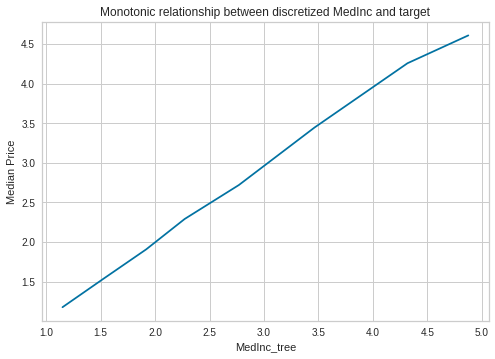

In [24]:
y_test.groupby(X_test["MedInc_tree"]).mean().plot()

plt.title("Monotonic relationship between discretized MedInc and target")

plt.ylabel("Median Price")

Text(0, 0.5, 'Number of observations')

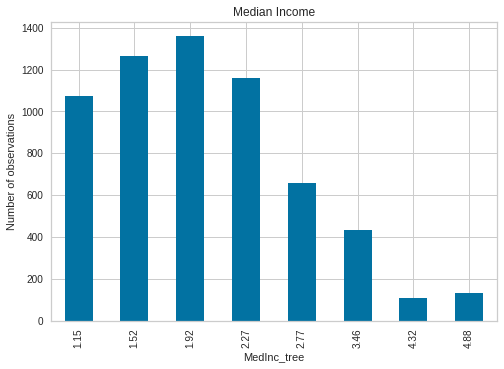

In [29]:
X_test["MedInc_tree"] = np.round(X_test["MedInc_tree"],2)

X_test.groupby(["MedInc_tree"])["MedInc"].count().plot.bar()

plt.title("Median Income")

plt.ylabel("Number of observations")

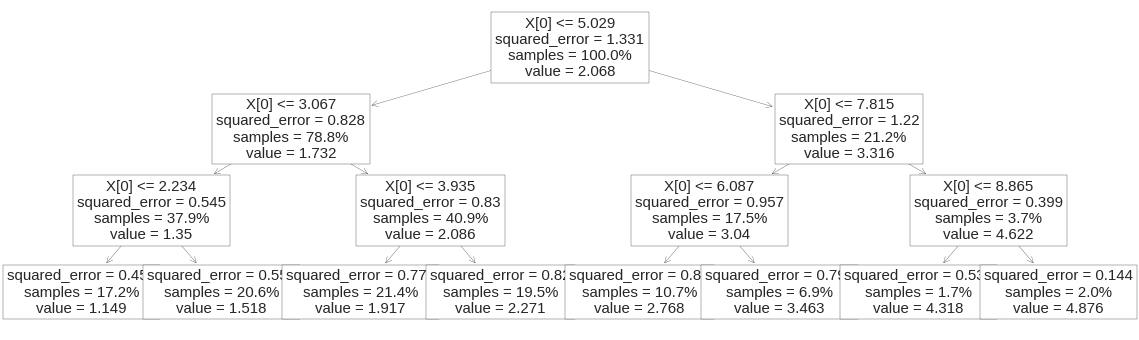

In [28]:
fig = plt.figure(figsize=(20, 6))

plot_tree(tree_model, fontsize=15, proportion=True)

plt.show()

In [37]:
from feature_engine.discretisation import DecisionTreeDiscretiser

variables = list(X.columns)[:-2]


treeDisc = DecisionTreeDiscretiser(cv=3,scoring='neg_mean_squared_error',variables=variables,
                                   regression=True,param_grid={'max_depth': [1, 2, 3],
                                                            "min_samples_leaf": [10, 20, 50]},)


treeDisc.fit(X_train, y_train)

treeDisc.binner_dict_["MedInc"].best_params_

train_t = treeDisc.transform(X_train)

test_t = treeDisc.transform(X_test)

In [ ]:
plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):

    # location in figure

    ax = plt.subplot(3, 1, i + 1)

    # variable to plot

    var = variables[i]

    # determine proportion of observations per bin

    t1 = train_t[var].value_counts(normalize=True)

    t2 = test_t[var].value_counts(normalize=True)

    # concatenate proportions

    tmp = pd.concat([t1, t2], axis=1)

    tmp.columns = ["train", "test"]

    # order the intervals

    tmp.sort_index(inplace=True)

    tmp.plot.bar(ax=ax)

    plt.xticks(rotation=45)

    plt.ylabel('Observations per bin')

    # add variable name as title

    ax.set_title(var)

    plt.show()